In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv('Classified Data',index_col=0)

In [78]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


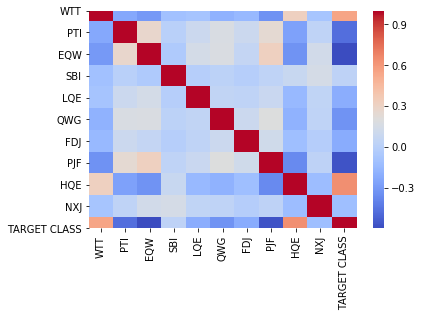

In [79]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [80]:
from sklearn.preprocessing import StandardScaler

In [110]:
df.drop('SBI',axis=1,inplace=True)

In [111]:
df.head()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [112]:
ss=StandardScaler()

In [113]:
scaled_array=ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [114]:
scaled_array

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [115]:
scaled_array.shape

(1000, 9)

In [116]:
x=pd.DataFrame(data=scaled_array,columns=df.columns[:-1]) # we giving coloumns name here.

In [117]:
x

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [118]:
y=df['TARGET CLASS']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

In [121]:
X_train.shape

(700, 9)

In [122]:
X_test.shape

(300, 9)

In [123]:
y_train.shape

(700,)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn=KNeighborsClassifier()

In [126]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [127]:
ypred=knn.predict(X_test)

In [128]:
import numpy as np

In [129]:
ypred!=y_test #true is given when data is not equal. wrong prediction.(error rate)

493    False
432     True
367    False
694    False
788    False
       ...  
483    False
133    False
141    False
542    False
250    False
Name: TARGET CLASS, Length: 300, dtype: bool

In [130]:
np.mean(ypred!=y_test) #given mean of true values only.

0.07

In [140]:
error_rate=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    error_rate.append(np.mean(ypred!=y_test))

In [141]:
error_rate

[0.07333333333333333,
 0.09,
 0.07,
 0.07333333333333333,
 0.07,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333333,
 0.06,
 0.07,
 0.07,
 0.06666666666666667,
 0.07,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06666666666666667,
 0.06,
 0.06,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.056666666666666664,
 0.06,
 0.06333333333333334,
 0.06,
 0.056666666666666664,
 0.06,
 0.06,
 0.06,
 0.06,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.06,
 0.056666666666666664,
 0.06,
 0.06666666666666667,
 0.07,
 0.06666666666666667,
 0.06666666666666667]

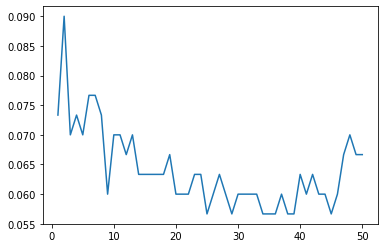

In [142]:
plt.plot(range(1,51),error_rate)

In [147]:
knn=KNeighborsClassifier(n_neighbors=9)

In [148]:
knn.fit(X_train,y_train)
yred=knn.predict(X_test)
knn.score(X_test,y_test)

0.94

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
confusion_matrix(y_test,ypred)

array([[138,   9],
       [ 11, 142]])

In [151]:
(138+142)/300

0.9333333333333333

In [470]:
#len(y)

In [471]:
#import math
#math.sqrt(len(y_test))